# 1)Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2)Loading the datasets

In [2]:
customers = pd.read_csv("C:/Users/srava/OneDrive/Desktop/Customers.csv")
products = pd.read_csv("C:/Users/srava/OneDrive/Desktop/Products.csv")
transactions = pd.read_csv("C:/Users/srava/OneDrive/Desktop/Transactions.csv")

In [3]:
customers.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
customers


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [5]:
products


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [6]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


# 3)Cleaning the datasets

In [7]:
# Checking for missing values
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
# Checking for duplicate records
print("\nChecking for Duplicates:")

# Customers
print("Customers Duplicates:", customers.duplicated().sum())

# Products
print("Products Duplicates:", products.duplicated().sum())

# Transactions
print("Transactions Duplicates:", transactions.duplicated().sum())


Checking for Duplicates:
Customers Duplicates: 0
Products Duplicates: 0
Transactions Duplicates: 0


In [9]:
# Check data types for all datasets
print("\nChecking Data Types:")
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)


Checking Data Types:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [10]:
# Check for negative or invalid prices/quantities
print("\nChecking for Negative/Invalid Values:")

# Customers - No such issue for Customer-related fields
print("Customers: No issues identified.")

# Products - Check for negative prices
print("Products Negative Prices:", (products["Price"] < 0).sum())

# Transactions - Check for negative quantities or total value
print("Transactions Negative Quantities:", (transactions["Quantity"] < 0).sum())
print("Transactions Invalid Total Value:", (transactions["TotalValue"] < 0).sum())


Checking for Negative/Invalid Values:
Customers: No issues identified.
Products Negative Prices: 0
Transactions Negative Quantities: 0
Transactions Invalid Total Value: 0


# 4)Exploratory Data Analysis (EDA)

# Descriptive Statistics

In [18]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(c.describe())
print(p.describe())
print(t.describe())


Descriptive Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


# Distribution of Product Prices

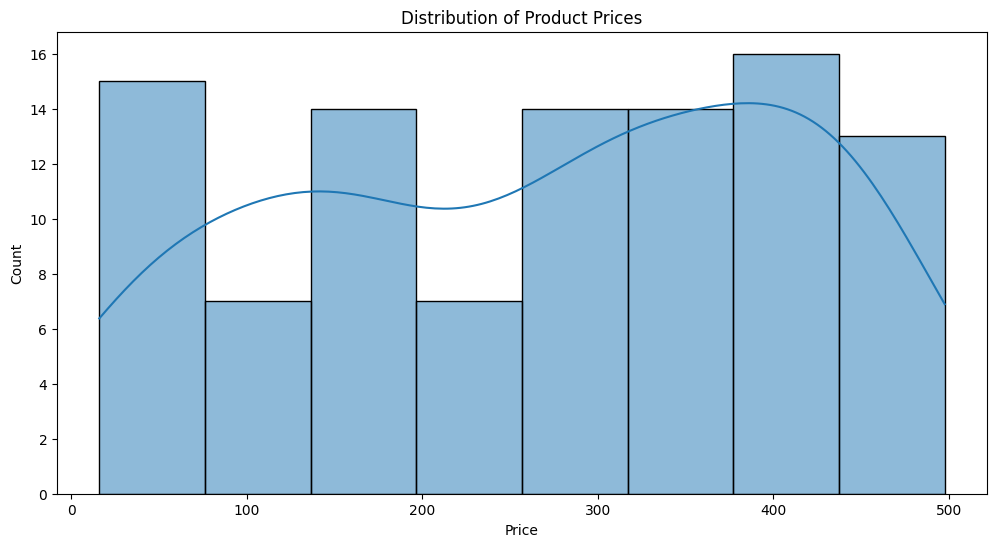

In [52]:
# Visualizing the distribution of Prices in Products
plt.figure(figsize=(12, 6))
sns.histplot(products["Price"], kde=True)
plt.title("Distribution of Product Prices")
plt.show()

# Correlation heatmap

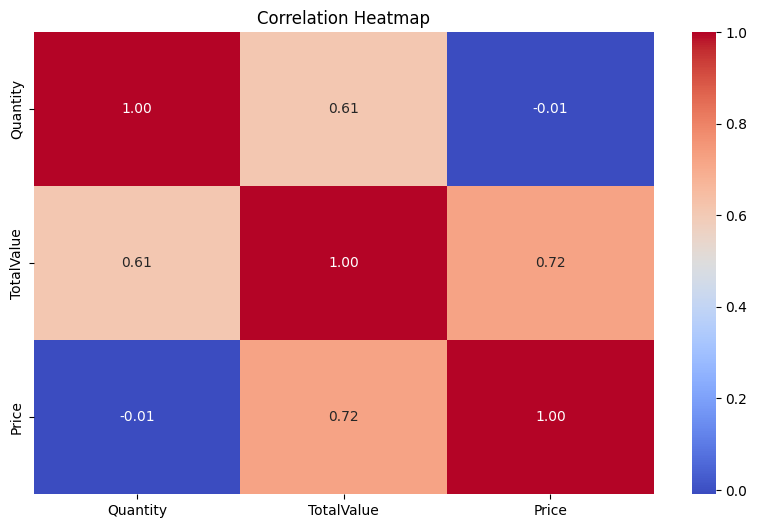

In [53]:

corr_matrix = t[['Quantity', 'TotalValue', 'Price']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Top 10 spenders

In [33]:
# Calculate average spending per customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Top 10 spenders
top_spenders = customer_spending.head(10)
top_spenders

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

C:\Users\srava\AppData\Local\Temp\ipykernel_26760\4201945004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spenders.index, y=top_spenders.values, palette="YlGnBu")


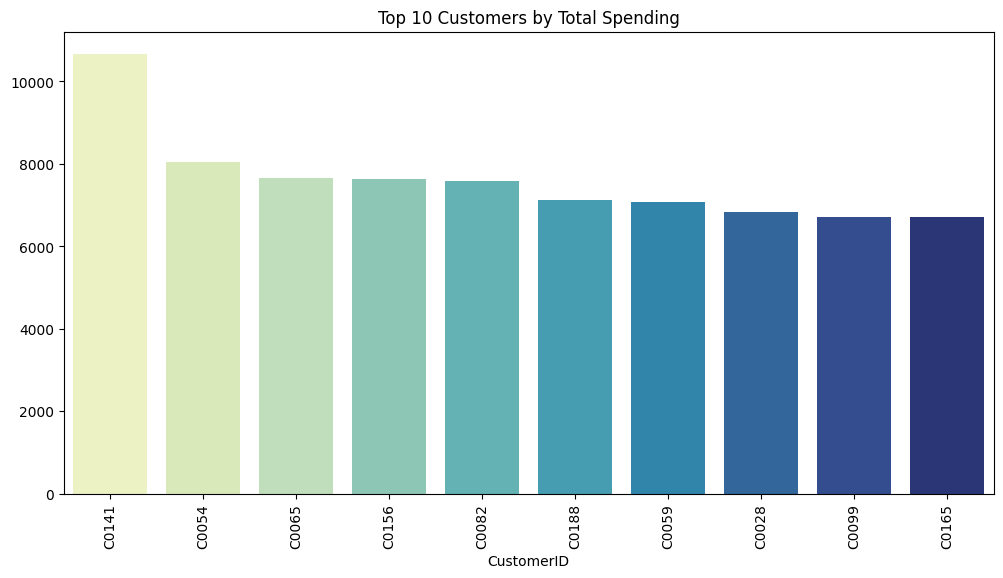

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_spenders.index, y=top_spenders.values, palette="YlGnBu")
plt.title("Top 10 Customers by Total Spending")
plt.xticks(rotation=90)
plt.show()

# Distribution of Customers by Region

C:\Users\srava\AppData\Local\Temp\ipykernel_26760\92473768.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


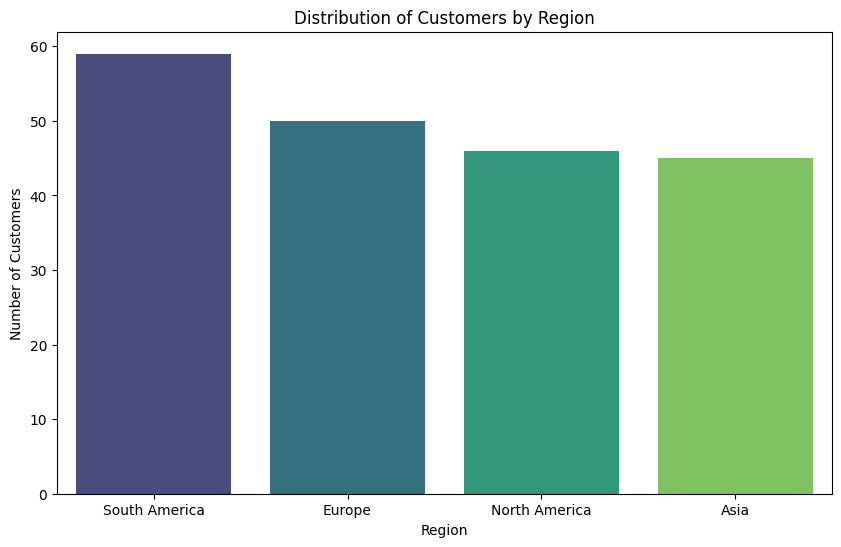

In [54]:

region_counts = customers['Region'].value_counts()

# Plotting the region distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


# Product Pricing Patterns

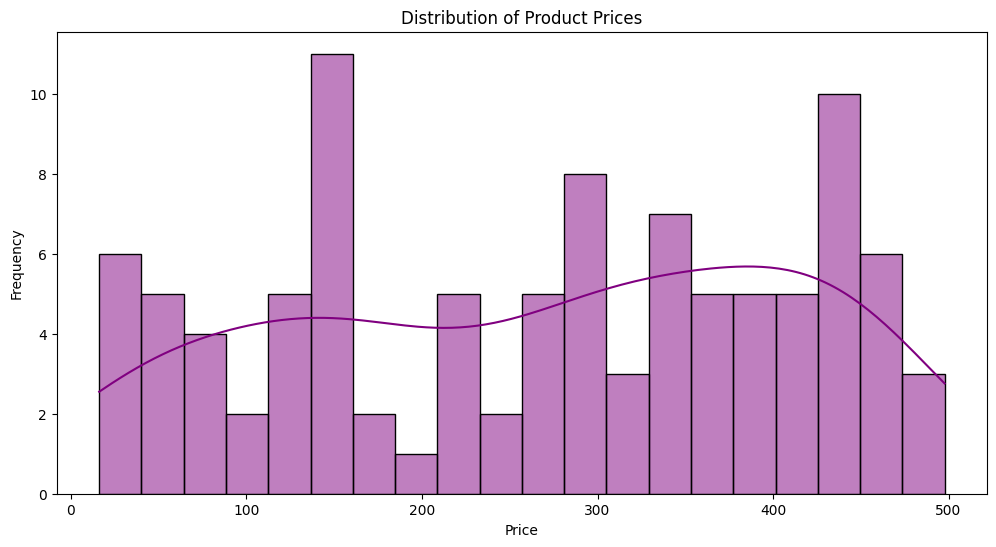

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [59]:

plt.figure(figsize=(12, 6))
sns.histplot(products['Price'], kde=True, color='purple', bins=20)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Summary of price range distribution
price_summary = products['Price'].describe()
print(price_summary)


# Transaction Volume and Customer Activity

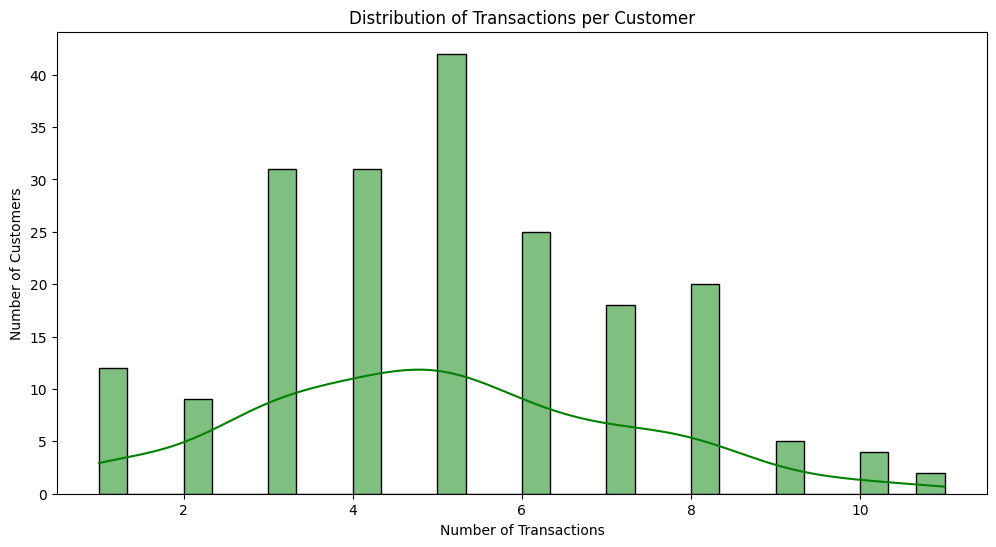

Average number of transactions per customer: 5.025125628140704


In [56]:

transaction_counts = transactions['CustomerID'].value_counts()

# Plotting the number of transactions per customer
plt.figure(figsize=(12, 6))
sns.histplot(transaction_counts, kde=True, color='green', bins=30)
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

# Average number of transactions per customer
avg_transactions = transaction_counts.mean()
print(f"Average number of transactions per customer: {avg_transactions}")


# Top 10 Customers by number of Transactions

C:\Users\srava\AppData\Local\Temp\ipykernel_26760\3413336068.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers_by_transactions.index, y=top_customers_by_transactions.values, palette="YlGnBu")


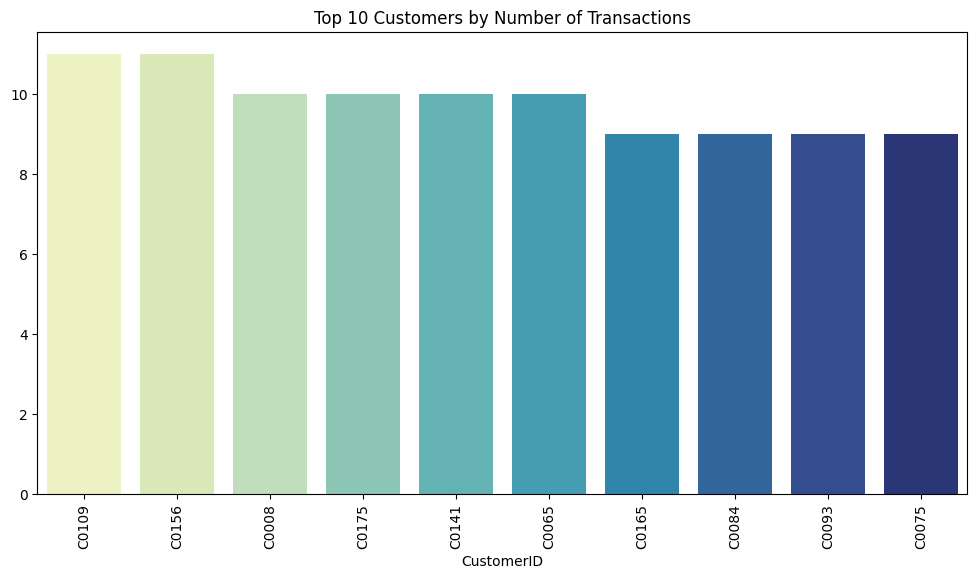

In [62]:
# Group by CustomerID and count the number of transactions for each customer
top_customers_by_transactions = t.groupby('CustomerID')['TransactionID'].nunique().sort_values(ascending=False).head(10)

# Create the bar plot for top customers by number of transactions
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers_by_transactions.index, y=top_customers_by_transactions.values, palette="YlGnBu")
plt.title("Top 10 Customers by Number of Transactions")
plt.xticks(rotation=90)
plt.show()



In [64]:
# Group by CustomerID and count the number of transactions for each customer
top_customers_by_transactions = t.groupby('CustomerID')['TransactionID'].nunique().sort_values(ascending=False).head(10)

# Convert to DataFrame for better visualization
top_customers_df = top_customers_by_transactions.reset_index()

# Rename columns for clarity
top_customers_df.columns = ['CustomerID', 'Number of Transactions']

# Display the DataFrame
print(top_customers_df)


  CustomerID  Number of Transactions
0      C0109                      11
1      C0156                      11
2      C0008                      10
3      C0175                      10
4      C0141                      10
5      C0065                      10
6      C0165                       9
7      C0084                       9
8      C0093                       9
9      C0075                       9


# Top-Selling Products

C:\Users\srava\AppData\Local\Temp\ipykernel_26760\1265650516.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_products['ProductID'], y=top_selling_products['TotalValue'], palette='magma')


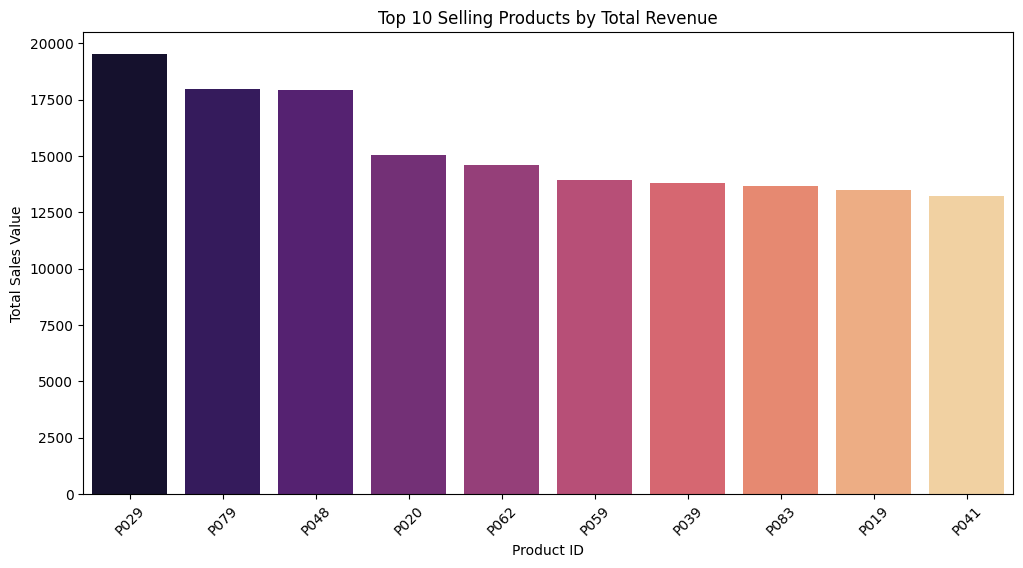

In [63]:

# Calculate total sales per product
product_sales = transactions.groupby('ProductID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

# Sort products by total sales value
top_selling_products = product_sales.sort_values(by='TotalValue', ascending=False).head(10)

# Plotting top-selling products based on total value
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products['ProductID'], y=top_selling_products['TotalValue'], palette='magma')
plt.title('Top 10 Selling Products by Total Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


# Top-Selling Categories

C:\Users\srava\AppData\Local\Temp\ipykernel_26760\211143183.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories['Category'], y=top_categories['TotalValue'], palette='viridis')


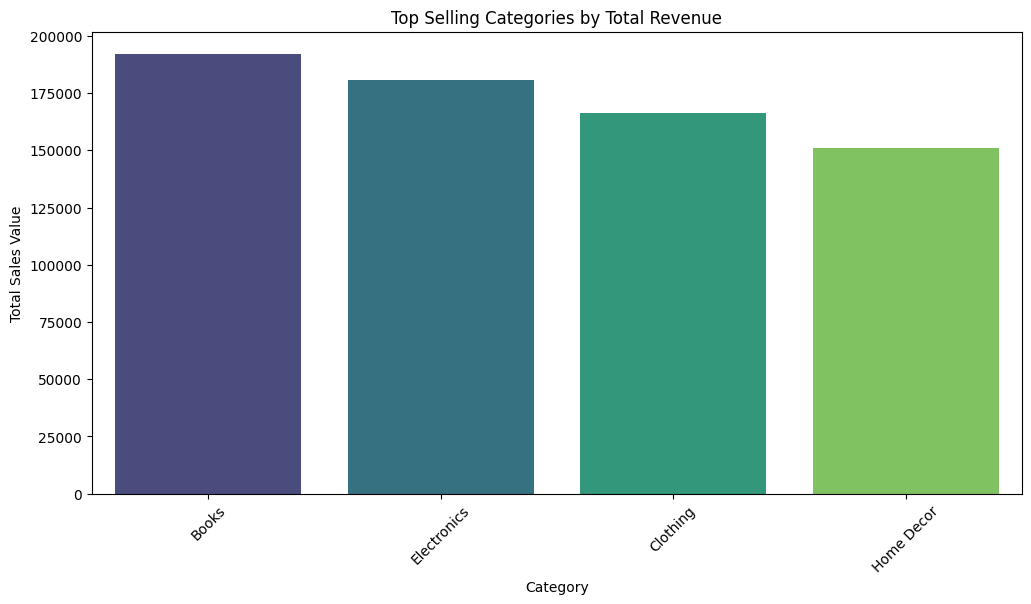

In [65]:
# Merge the product sales data with product details to get category information
product_sales_with_category = product_sales.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Calculate total sales per category
category_sales = product_sales_with_category.groupby('Category').agg({'TotalValue': 'sum'}).reset_index()

# Sort categories by total sales value in descending order
top_categories = category_sales.sort_values(by='TotalValue', ascending=False)

# Plotting the top categories based on total sales value
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories['Category'], y=top_categories['TotalValue'], palette='viridis')
plt.title('Top Selling Categories by Total Revenue')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


# Seasonality of Purchases

In [58]:

# Convert 'TransactionDate' to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract month and year from TransactionDate
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Year'] = transactions['TransactionDate'].dt.year

# Monthly sales analysis
monthly_sales = transactions.groupby('Month').agg({'TotalValue': 'sum'}).reset_index()
monthly_sales


,Month,TotalValue
0,1,66376.39
1,2,51459.27
2,3,47828.73
3,4,57519.06
4,5,64527.74
5,6,48771.18
6,7,71366.39
7,8,63436.74
8,9,70603.75
9,10,47063.22


In [46]:
# Sorting monthly_sales by TotalValue in descending order
monthly_sales_sorted = monthly_sales.sort_values(by='TotalValue', ascending=False)
monthly_sales_sorted

,Month,TotalValue
6,7,71366.39
8,9,70603.75
0,1,66376.39
4,5,64527.74
7,8,63436.74
11,12,62818.72
3,4,57519.06
1,2,51459.27
5,6,48771.18
2,3,47828.73


# Top 5 months

In [47]:
# Mapping month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Adding a new column for month names
monthly_sales_sorted['MonthName'] = monthly_sales_sorted['Month'].map(month_names)

# Getting the top 5 months based on total sales value
top_5_months = monthly_sales_sorted.head(5)

# Displaying the top 5 months with their names
print(top_5_months[['MonthName', 'TotalValue']])


   MonthName  TotalValue
6       July    71366.39
8  September    70603.75
0    January    66376.39
4        May    64527.74
7     August    63436.74


# Total Sales by Month(Most to Least) 

C:\Users\srava\AppData\Local\Temp\ipykernel_26760\4157544996.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales_sorted_all['Month'].map(month_names), y=monthly_sales_sorted_all['TotalValue'], palette='Blues_d')


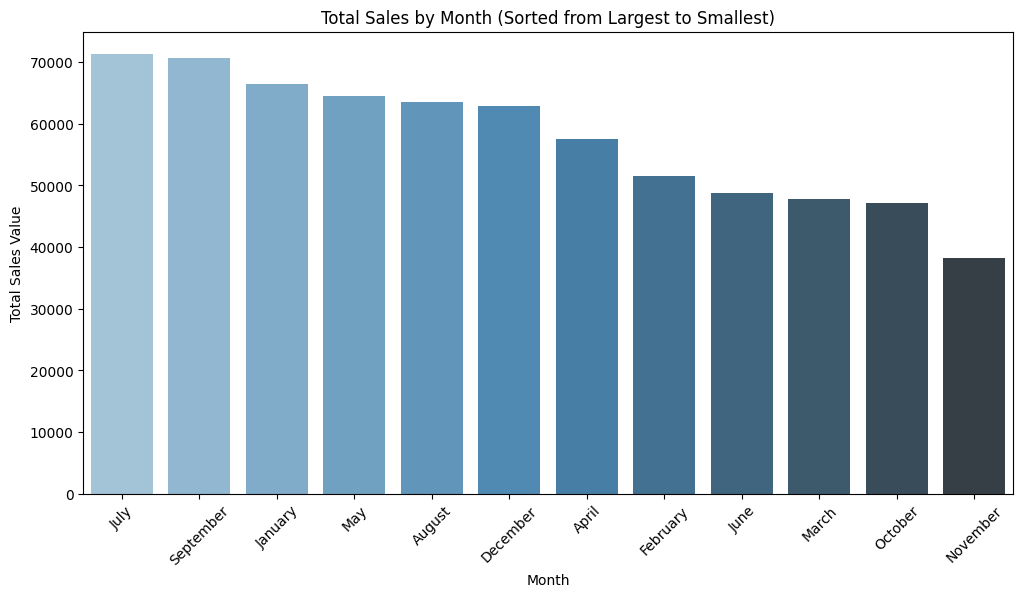

In [66]:
# Sorting the monthly sales by TotalValue in descending order for all months
monthly_sales_sorted_all = monthly_sales.sort_values(by='TotalValue', ascending=False)

# Plotting the total sales by month for all months
plt.figure(figsize=(12, 6))

# Bar plot with months and total sales value, sorted from largest to smallest
sns.barplot(x=monthly_sales_sorted_all['Month'].map(month_names), y=monthly_sales_sorted_all['TotalValue'], palette='Blues_d')

# Adding title and labels
plt.title('Total Sales by Month (Sorted from Largest to Smallest)')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
